# Desnormalizar datos
El dataset tiene los datos en formato de lectura para Yolo. Tiene los valores que marcan las esquinas de los recuadros con valores de entre 0 a 1. 
Pasaremos la información a coordenadas absolutas.

Recorreremos las imágenes para obtener las dimensiones y cambiaremos los valores de las etiquetas.

Posteriormente pintaremos alguna con opencv para ver si lo hemos hecho bien.

import os #para ver archivos

In [4]:
import os #para ver archivos
from PIL import Image, ImageDraw #para trabajar con imágenes

## 1. Comprobaciones
Vamos a hacer varias comprobaciones antes de modificar las etiquetas.
1. Se puede encontrar una etiqueta por el nombre de la foto.
2. Ver dimensiones de la imagen.
3. Pintar la imagen para ver si está bien enlazado.

In [5]:
test_images_path = '../data/test/images'
train_images_path = '../data/train/images'

test_labels_path = '../data/test/labels/DEF_LABELS'
train_labels_path = '../data/train/labels/DEF_LABELS'

In [8]:
#cogemos nombre de una imagen
img_name = os.listdir(train_images_path)[0]
img_name

'Poselet_10.jpg'

In [9]:
#probamos si encontramos la etiqueta
label_path = os.path.join(train_labels_path, img_name[:-4]+'.txt')
print('label_path: ',label_path)
try:
    lb = open(label_path,'rb')
    for i in lb.readlines():
        print(i)
except:
    print('No se pudo encontrar el archivo')

label_path:  ../data/train/labels/DEF_LABELS\Poselet_10.txt
b'0 0.2353515625 0.7317708333333334 0.0712890625 0.09375\r\n'
b'0 0.3818359375 0.87890625 0.0712890625 0.11979166666666667\r\n'
b'0 0.4970703125 0.8346354166666666 0.09765625 0.12630208333333334\r\n'
b'0 0.4970703125 0.8346354166666666 0.09765625 0.12630208333333334\r\n'


Podemos enlazar correctamente la imagen con su etiqueta

In [10]:
try:
    with Image.open(os.path.join(train_images_path, img_name)) as img:
        print(f'Formato: {img.format}')
        print(f'Tamaño (ancho x alto): {img.size}')
        print(f'Modo de color: {img.mode}')
except:
    print('No se pudo encontrar el archivo')

Formato: JPEG
Tamaño (ancho x alto): (1024, 768)
Modo de color: RGB


Podemos ver la información de la imagen

In [11]:
import re
def view_label_info_from_image(label_path,folder_labels_path):
    try:
        lb = open(label_path,'rb')
        points = []
        for box in lb.readlines():
            numbers = re.findall(r'\d+\.\d+|\d+', box.decode('utf-8'))
            numbers = [int(numbers[0])] + [float(n) for n in numbers[1:]]
            points.append(numbers)
        return points
    except:
        print('No se pudo encontrar el archivo')

In [12]:
view_label_info_from_image('../data/train/labels/DEF_LABELS\VOC2007_7.txt',test_labels_path)

[[0, 0.364, 0.4864864864864865, 0.208, 0.32732732732732733],
 [0, 0.69, 0.6846846846846847, 0.168, 0.2852852852852853]]

[class, normalized x center,  normalizedy center,   normalized width, normalized height           ]                 One line per point

['0', '0.2353515625',       '0.7317708333333334', '0.0712890625', '0.09375']

In [13]:
def yolo_to_absolute_coord(coords, img_size):
    img_width = img_size[0]
    img_height = img_size[1]
    result = []
    for coord in coords:
        center_x = coord[1]*img_width
        center_y = coord[2]*img_height

        width = coord[3]*img_width
        height = coord[4]*img_height
        result.append([coord[0], center_x,center_y, width, height])
    return result


test_img name = Poselet_10.jpg

In [14]:
def print_img_with_bounding_boxes(img_name, img_folder_path,label_folder_path):
    try:
        with Image.open(os.path.join(img_folder_path, img_name)) as img:
            size = img.size
            label_path = os.path.join(label_folder_path, img_name[:-4]+'.txt')
            coords = view_label_info_from_image(label_path,train_labels_path)
            coords = yolo_to_absolute_coord(coords, size)
            draw = ImageDraw.Draw(img)
            radio = 5
            for point in coords:
                #   0       1         2      3      4
                #[class, x_center,y_center,width,height]
                draws = []
                draws.append((point[1] - point[3]/2 , point[2]-point[4]/2))#top_let
                draws.append((point[1] + point[3]/2 , point[2]-point[4]/2))#top_rigth
                draws.append((point[1] - point[3]/2 , point[2]+point[4]/2))#buttom_left
                draws.append((point[1] + point[3]/2 , point[2]+point[4]/2))#buttom_right
                for i in draws:
                    draw.ellipse((i[0] - radio, i[1] - radio, i[0] + radio, i[1] + radio),fill='red')

            img.show()

    except:
        print('Print error')
        
print_img_with_bounding_boxes('Poselet_3.jpg',train_images_path,train_labels_path)
print_img_with_bounding_boxes('Poselet_10.jpg',train_images_path,train_labels_path)
print_img_with_bounding_boxes('VOC2007_8.jpg',test_images_path,test_labels_path)

## 2. Desnormalizar datos
1. Recorrer todas las etiquetas, de test y train
2. modificar formato de yolo a no normalizado
3. modificar contenido archivo
4. Testear

### Ejemplo único

In [15]:
names= os.listdir(test_labels_path)
names[0]

'VOC2007_101.txt'

In [16]:
values = view_label_info_from_image(os.path.join(test_labels_path,names[10]),test_labels_path)
values

[[0, 0.196, 0.27466666666666667, 0.194, 0.256],
 [0, 0.596, 0.48, 0.154, 0.11466666666666667]]

Todo funciona correctamente, vamos a cambiar las etquetas

# 3. Cambio de etiquetas
test_labels_path = '../data/test/labels/DEF_LABELS'

train_labels_path = '../data/train/labels/DEF_LABELS'

Vamos a recorrer las etiquetas y aplicarle el cambio de formato

In [ ]:
from datetime import datetime
t0 = datetime.now()
counter = 0
for label in os.listdir(test_labels_path):
    #creamos path label
    label_path = os.path.join(test_labels_path, label)
    #creamos path imagen
    image_path = os.path.join(test_images_path, str(label).replace('.txt','.jpg') )
    img_size = None
    with Image.open(image_path) as img:
        img_size = img.size #guardamos dimensiones para la redimension
    coords = view_label_info_from_image(label_path, test_labels_path) #vemos informacion en formato YOLO
    coords = yolo_to_absolute_coord(coords,img_size) #convertimos el formato YOLO a píxeles
    with open(label_path,'w')as f:
        f.write('')#vacíamos el contenido de la etiqueta
    with open(label_path,'a')as f:
        for i in coords:
            new_coord = ''
            for j in i:
                new_coord = new_coord + str(int(j)) +' ' 
            f.write(new_coord +'\n')#añadimos la nueva lína de coordenadas
    counter +=1

print(counter,'archivos modificados')
counter = 0

for label in os.listdir(train_labels_path):
    #creamos path label
    label_path = os.path.join(train_labels_path, label)
    #creamos path imagen
    image_path = os.path.join(train_images_path, str(label).replace('.txt','.jpg') )
    img_size = None
    with Image.open(image_path) as img:
        img_size = img.size #guardamos dimensiones para la redimension
    coords = view_label_info_from_image(label_path, train_labels_path) #vemos informacion en formato YOLO
    coords = yolo_to_absolute_coord(coords,img_size) #convertimos el formato YOLO a píxeles
    with open(label_path,'w')as f:
        f.write('')#vacíamos el contenido de la etiqueta
    with open(label_path,'a')as f:
        for i in coords:
            new_coord = ''
            for j in i:
                new_coord = new_coord + str(int(j)) +' ' 
            f.write(new_coord +'\n')#añadimos la nueva lína de coordenadas
    counter +=1
print(counter,'archivos modificados')

print(f'task done in {datetime.now()-t0}')

Ya tenemos los datos con las dimensiones que usa tensorflow, pero tenemso que reaizar otro cambio.
Ahora mismo lo tenemos en formato
clase   x_centro    y_centro    anchura     altura

y lo queremos en formato:

clase   xmin   xmas   ymin    ymax

![Proyecto nuevo.jpg](<attachment:Proyecto nuevo.jpg>)
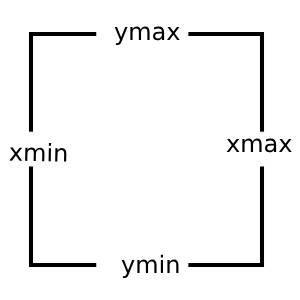

In [ ]:
t0 = datetime.now()
counter = 0
for label in os.listdir(test_labels_path):
    file_path = os.path.join(test_labels_path,label)
    old_coords = []
    new_coords=[]
    with open(file_path,'r') as file:
        for i in file.readlines():
            # points = [class, xmin, xmax, ymin, ymax]
            points = [0]
            temp = i.split(' ')
            #temp[1,len(temp)-1] = [ xcenter, ycenter, width, height]
            temp = [int(temp[j])  for j in range(1,len(temp)-1) ]
            points.append(int(temp[0]-temp[2]/2))#xmin
            points.append(int(temp[0]+temp[2]/2))#xmax
            points.append(int(temp[1]-temp[3]/2))#ymin
            points.append(int(temp[1]+temp[3]/2))#ymax
            new_coords.append(points)
            
        with open(file_path,'w')as f:
            f.write('')
        with open(file_path,'a')as f:
            for i in new_coords:
                new_coord = ''
                for j in i:
                    new_coord = new_coord + str(int(j)) +' ' 
                f.write(new_coord +'\n')#añadimos la nueva lína de coordenadas
    counter+=1
print(counter,'archivos modificados')
counter = 0
                
for label in os.listdir(train_labels_path):
    file_path = os.path.join(train_labels_path,label)
    old_coords = []
    new_coords=[]
    with open(file_path,'r') as file:
        for i in file.readlines():
            # points = [class, xmin, xmax, ymin, ymax]
            points = [0]
            temp = i.split(' ')
            #temp[1,len(temp)-1] = [ xcenter, ycenter, width, height]
            temp = [int(temp[j])  for j in range(1,len(temp)-1) ]
            points.append(int(temp[0]-temp[2]/2))#xmin
            points.append(int(temp[0]+temp[2]/2))#xmax
            points.append(int(temp[1]-temp[3]/2))#ymin
            points.append(int(temp[1]+temp[3]/2))#ymax
            new_coords.append(points)
            
        with open(file_path,'w')as f:
            f.write('')
        with open(file_path,'a')as f:
            for i in new_coords:
                new_coord = ''
                for j in i:
                    new_coord = new_coord + str(int(j)) +' ' 
                f.write(new_coord +'\n')#añadimos la nueva lína de coordenadas
    counter +=1
print(counter,'archivos modificados')

print(f'task done in {datetime.now()-t0}')

[351, 242, 149, 172]
[0, 276, 425, 156, 328]
[235, 164, 66, 88]
[0, 202, 268, 120, 208]
[259, 295, 65, 62]
[0, 226, 291, 264, 326]
[26, 229, 113, 129]
[0, -30, 82, 164, 293]
[335, 142, 34, 35]
[0, 318, 352, 124, 159]
[239, 242, 58, 55]
[0, 210, 268, 214, 269]
[211, 211, 51, 38]
[0, 185, 236, 192, 230]
[214, 350, 28, 36]
[0, 200, 228, 332, 368]
[45, 310, 57, 45]
[0, 16, 73, 287, 332]
[163, 310, 47, 51]
[0, 139, 186, 284, 335]
[176, 330, 67, 65]
[0, 142, 209, 297, 362]
[212, 229, 81, 79]
[0, 171, 252, 189, 268]
[284, 154, 34, 35]
[0, 267, 301, 136, 171]
[318, 185, 40, 41]
[0, 298, 338, 164, 205]
[98, 103, 97, 96]
[0, 49, 146, 55, 151]
[298, 180, 77, 43]
[0, 259, 336, 158, 201]
[138, 104, 43, 40]
[0, 116, 159, 84, 124]
[117, 133, 26, 40]
[0, 104, 130, 113, 153]
[355, 211, 55, 35]
[0, 327, 382, 193, 228]
[387, 163, 61, 35]
[0, 356, 417, 145, 180]
[64, 200, 68, 54]
[0, 30, 98, 173, 227]
[114, 201, 47, 47]
[0, 90, 137, 177, 224]
[153, 193, 40, 32]
[0, 133, 173, 177, 209]
[183, 338, 58, 59]
[

## 4. Crear archivos TFRecord
Vamsoa convertir el dataset a .tfrecord para que tensoflow lo pueda leer correctamnente.
Para crear un archivo TFRecord necesitamos una lista de caracterisiticas, cada caracteristica es un diccionario con la siguiente información:
* image/encoded: imagen codificada en JPEG o PNG
* image/filename: nombre archivo
* image/heigth, mimage/width: dimensiones arvhivo
* image/object/class/label: etiquet de la clase, en este caso 0 (mano)
* image/object/bbox/xmin, xmax, ymin, ymax: coordenadas del bounding box

In [6]:
import tensorflow as tf
import io

#### (image/encoded)
Función que convierte imagen a secuencia de bytes

In [ ]:
# def _bytes_image_feature(value):
#     return tf.train.Feature(bytes_list = tf.train.BytesList(value =[tf.io.encode_jpeg(value).numpy()] ))
# def _bytes_feature(value):
#     return tf.train.Feature(bytes_list = tf.train.BytesList(value =[value] ))

In [3]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value =[value]))

Función para leer un valor numérico

In [2]:
def _int64_feature(value):
    return tf.train.Feature(int64_list = tf.train.Int64List(value=value))
def _float_feature(value):
    return tf.train.Feature(float_list = tf.train.FloatList(value=value))

In [1]:
def create_sample(image_path, label_path):
    #leer imagen
    img = Image.open((image_path))
    #asegurar el canal de color
    img = img.convert('RGB')
    #gurardar dimensiones originales
    original_w, original_h = img.size
    #hacer resize para poder pasar el mismo input por le modelo
    img = img.resize((320,320)) #320 porque es la entrada de input de mobilenet 320x320 coco

    #leer las etiquetas
    with open(label_path,'r') as file:
        lines = file.readlines()

    #inicializamos listas
    class_ids = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    #rellenamos
    for line in lines:
        parts = line.strip().split()
        class_ids.append(int(parts[0]))
        xmin.append(int(parts[1])*img.size[0]/original_w)#adaptamos la posición a la nueva dimension de la imagen
        xmax.append(int(parts[2])*img.size[0]/original_w)
        ymin.append(int(parts[3])*img.size[1]/original_h)
        ymax.append(int(parts[4])*img.size[1]/original_h)
    
    #comprobación de si con la redimensión las etiquetas siguen estando bien
    # draw = ImageDraw.Draw(img)
    # radio = 5
    # draws = []
    # for i in range(len(class_ids)):
    #     draws.append((xmin[i] - radio, ymin[i] - radio))
    #     draws.append((xmax[i] + radio, ymin[i] - radio))
    #     draws.append((xmin[i] - radio, ymax[i] + radio))
    #     draws.append((xmax[i] + radio, ymax[i] + radio))
    # for i in draws:
    #     draw.ellipse((i[0] - radio, i[1] - radio, i[0] + radio, i[1] + radio),fill='red')
    # img.show()
        

    example = tf.train.Example(features =tf.train.Features(feature=
    {
        'image/encoded':_bytes_feature(tf.io.encode_jpeg(img)),#imagen codificada
        'image/filename':_bytes_feature(image_path.encode()),#nombre de la imagen codificado
        'image/object/class/label':_int64_feature(class_ids),#clases, es este caso es 0 porque solo reconocemanos
        'image/object/bbox/xmin':_float_feature(xmin),
        'image/object/bbox/xmax':_float_feature(xmax),
        'image/object/bbox/ymin':_float_feature(ymin),
        'image/object/bbox/ymax':_float_feature(ymax),
        'image/height':_int64_feature([img.height]),
        'image/width':_int64_feature([img.width])
    }))
    return example
    
        
# temp_img_path = r'test_data\test\images\VOC2007_3.jpg'
# temp_label_path = r'test_data\test\labels\VOC2007_3.txt'
# create_sample(temp_img_path,temp_label_path)

Una vez tenemos la función que crea os samples podemos empezar a crear los TFRecors

In [8]:
def create_tfrecord(data_dir,output_file):
    with tf.io.TFRecordWriter(output_file) as writer:#abrimos documento donde queremos crear el tfreord
        #recorremos imágenes y etiquetas
        images_path = os.path.join(data_dir,'images')
        labels_path = os.path.join(data_dir,'labels','DEF_LABELS')
        # labels_path = os.path.join(data_dir,'labels')
        
        for filename in os.listdir(images_path):
            image_path = os.path.join(images_path, filename)
            label_path = os.path.join(labels_path,filename.replace('.jpg','.txt'))

            if os.path.exists(label_path): #solo si esa imagen tiene etiqueta
                example = create_sample(image_path,label_path)
                writer.write(example.SerializeToString())
    print(f'TFRecord creado en {output_file}')


t0 = datetime.now()
# create_tfrecord('test_data/train','../TFRecords/train.tfrecord')
# create_tfrecord('test_data/test','../TFRecords/test.tfrecord')
create_tfrecord('../data/train','../TFRecords/train.tfrecord')
create_tfrecord('../data/test','../TFRecords/test.tfrecord')
'TFrecors created in ', datetime.now()-t0


TFRecord creado en ../TFRecords/train.tfrecord
TFRecord creado en ../TFRecords/test.tfrecord


('TFrecors created in ', datetime.timedelta(seconds=36, microseconds=144706))